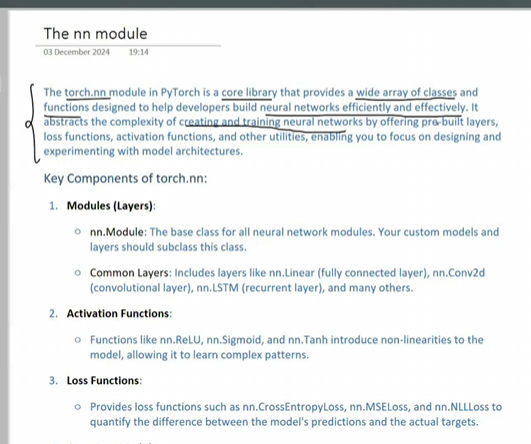
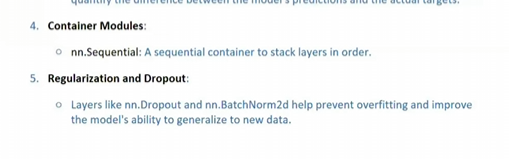

In [3]:
## Create model class
import torch
import torch.nn as nn

class My_Model(nn.Module):
    def __init__(self,num_features):

        super().__init__()
        self.linear1 = nn.Linear(num_features,1)
        self.sigmoid1 = nn.Sigmoid()
    
    def forward(self, features):
        out = self.linear1(features)
        out = self.sigmoid1(out)
    
        return out
    

In [4]:
#Creating features --> Matrix of 10 x 5
features = torch.rand(10,5)

## Creating model
model1 = My_Model(features.shape[1])

## Call model
model1(features)
## It will give the output (No need to call any other function)

tensor([[0.4447],
        [0.4006],
        [0.3753],
        [0.4219],
        [0.4120],
        [0.4242],
        [0.3848],
        [0.3895],
        [0.3987],
        [0.4469]], grad_fn=<SigmoidBackward0>)

In [6]:
features,features.shape

(tensor([[0.4385, 0.9297, 0.5534, 0.8210, 0.2682],
         [0.6408, 0.7713, 0.5937, 0.8484, 0.8383],
         [0.5885, 0.3725, 0.8052, 0.7895, 0.9235],
         [0.6848, 0.1332, 0.3687, 0.2717, 0.7338],
         [0.4392, 0.7917, 0.6267, 0.2448, 0.5210],
         [0.5424, 0.5147, 0.9496, 0.5208, 0.2167],
         [0.6244, 0.3669, 0.9638, 0.9354, 0.7270],
         [0.9301, 0.8772, 0.9844, 0.7411, 0.8227],
         [0.6170, 0.0019, 0.4535, 0.2526, 0.8865],
         [0.7884, 0.5680, 0.4598, 0.1788, 0.4478]]),
 torch.Size([10, 5]))

In [7]:
## Model weights
model1.linear1.weight

Parameter containing:
tensor([[ 0.2072,  0.0071, -0.2808,  0.0322, -0.3703]], requires_grad=True)

In [8]:
!pip install torchinfo

In [9]:
from torchinfo import summary
summary(model1,input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
My_Model                                 [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## For 2nd Model(With a hidden layer of 3 nodes)

In [ ]:
# create model class
class My_better_Model(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.network = nn.Sequential(       ## We used Sequential container here
        nn.Linear(num_features, 3),
        nn.ReLU(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

  def forward(self, features):

    out = self.network(features)

    return out

In [13]:
# create dataset
features2 = torch.rand(10,5)

# create model
model2 = My_better_Model(features.shape[1])

# call model for forward pass
# model.forward(features)
model2(features2)

tensor([[0.4413],
        [0.4084],
        [0.4113],
        [0.4142],
        [0.4044],
        [0.4184],
        [0.4204],
        [0.4331],
        [0.4135],
        [0.4084]], grad_fn=<SigmoidBackward0>)

# Making complete pipeline using torch.nn

### As done in training_pipeline

In [14]:
## All the imports and pre-processing
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [15]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

### Defining the model

In [16]:
import torch.nn as nn

class MySimpleNN_using_nn(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [17]:
## Important Params
learning_rate = 0.1
epochs = 25
# define loss function (built-in)
loss_function = nn.BCELoss()

In [21]:
## Training Pipeline

# create model
model = MySimpleNN_using_nn(X_train_tensor.shape[1])

# define optimizer
## Using Batch Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients before performing backward prop(Better method)
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.9096764326095581
Epoch: 1, Loss: 0.6346886157989502
Epoch: 2, Loss: 0.4988575577735901
Epoch: 3, Loss: 0.42448875308036804
Epoch: 4, Loss: 0.3770889341831207
Epoch: 5, Loss: 0.3437534272670746
Epoch: 6, Loss: 0.3187391757965088
Epoch: 7, Loss: 0.2990947365760803
Epoch: 8, Loss: 0.2831403911113739
Epoch: 9, Loss: 0.2698450982570648
Epoch: 10, Loss: 0.2585390508174896
Epoch: 11, Loss: 0.24876639246940613
Epoch: 12, Loss: 0.2402055859565735
Epoch: 13, Loss: 0.23262245953083038
Epoch: 14, Loss: 0.22584210336208344
Epoch: 15, Loss: 0.21973097324371338
Epoch: 16, Loss: 0.21418502926826477
Epoch: 17, Loss: 0.20912183821201324
Epoch: 18, Loss: 0.20447522401809692
Epoch: 19, Loss: 0.20019112527370453
Epoch: 20, Loss: 0.1962250918149948
Epoch: 21, Loss: 0.1925399750471115
Epoch: 22, Loss: 0.1891045868396759
Epoch: 23, Loss: 0.18589238822460175
Epoch: 24, Loss: 0.18288074433803558


In [22]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5387811660766602
